# DBSCAN

First, let's setup some imports.

In [1]:
import numpy as np

from dataviz import generate_clusters
from dataviz import plot_clusters
from dataviz import plot_data
from dbscan import DBSCAN

## Case 1

* 20 randomly generated points in the range [1, 100]

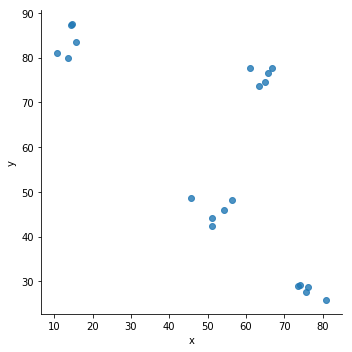

In [2]:
def generate_data(num_clusters: int, seed=None) -> np.ndarray:
    num_points = 20
    spread = 7
    bounds = (1, 100)
    clusters = generate_clusters(num_clusters,
                                 num_points,
                                 spread,
                                 bounds,
                                 bounds,
                                 seed)
    return np.array(clusters)

num_clusters = 4
clusters = generate_data(num_clusters, seed=1)
plot_data(clusters)

Let's choose `min_samples` to be 5 because there are **5** points per cluster,

The largest distance from a point to the medoid of any cluster appears to be around **6**.

Let's use that as `eps`.

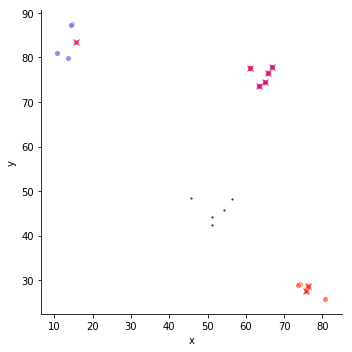

In [3]:
dbscan = DBSCAN(eps=6, min_samples=5)
dbscan.fit(clusters)
plot_clusters(clusters, dbscan.labels_, dbscan.components_)

* Red crosses denote **core points**
* Small black dots denote **noise points**

The middle cluster was classified as noise.

Let's increase `eps` from **6** to **7** to try and capture that as a cluster.

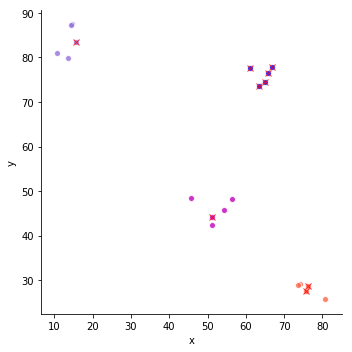

In [4]:
dbscan = DBSCAN(eps=7, min_samples=5)
dbscan.fit(clusters)
plot_clusters(clusters, dbscan.labels_, dbscan.components_)

## Case 2

* 10 randomly generated points each for ranges [1, 30] and [70, 99].

In [5]:
def generate_data(bounds, seed=None) -> np.ndarray:
    num_clusters = 1
    num_points = 10
    spread = 7
    clusters = generate_clusters(num_clusters,
                                 num_points,
                                 spread,
                                 bounds,
                                 bounds,
                                 seed)
    return np.array(clusters)

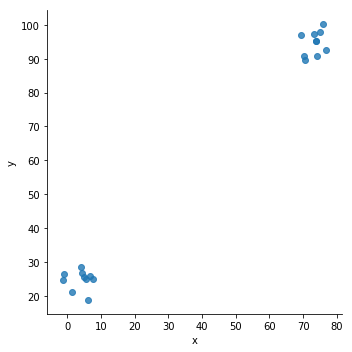

In [6]:
first_cluster = generate_data((1, 30), seed=1)
second_cluster = generate_data((70, 99), seed=1)
clusters = np.append(first_cluster, second_cluster, axis=0)
plot_data(clusters)

Now each cluster has **10** points. Let's update `min_samples` to 10 and keep `eps` the same.

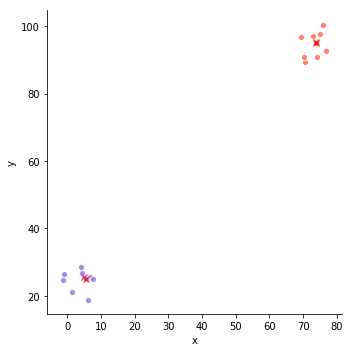

In [7]:
dbscan = DBSCAN(eps=7, min_samples=10)
dbscan.fit(clusters)
plot_clusters(clusters, dbscan.labels_, dbscan.components_)

## Case 3

* 10 randomly generated points in [1, 30]
* 50 randomly generated points in [70, 99]

In [8]:
def generate_data(num_points, bounds, seed=None) -> np.ndarray:
    num_clusters = 1
    spread = 7
    clusters = generate_clusters(num_clusters,
                                 num_points,
                                 spread,
                                 bounds,
                                 bounds,
                                 seed)
    return np.array(clusters)

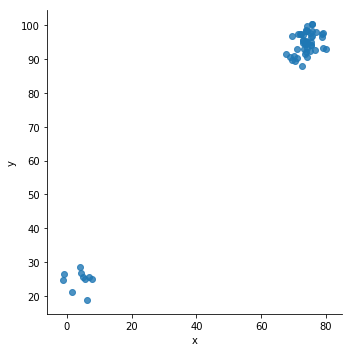

In [9]:
first_cluster = generate_data(10, (1, 30), seed=1)
second_cluster = generate_data(50, (70, 99), seed=1)
clusters = np.append(first_cluster, second_cluster, axis=0)
plot_data(clusters)

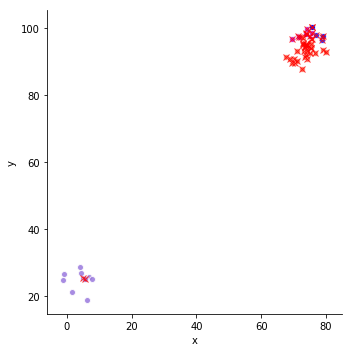

In [10]:
dbscan = DBSCAN(eps=7, min_samples=10)
dbscan.fit(clusters)
plot_clusters(clusters, dbscan.labels_, dbscan.components_)

In [11]:
num_clusters = len(np.unique(dbscan.labels_))
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 4


DBSCAN splits the larger cluster into 3 clusters.

This is because the two clusters have varying densities.